In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
# Import data

nba_df = pd.read_csv(r'C:\Users\abelg\Documents\Programs\SQL\SSMS\SQL NBA analysis project\NBAdatacleaned.csv')

display(HTML(nba_df.head().to_html()))
print("Number of rows in the data set =", len(nba_df))

,year_id,fran_id,avg_pts,avg_opp_pts,avg_elo_n,avg_opp_elo_n,avg_pts_differential,avg_elo_differential,total_wins
0,1995,Bucks,99.341463,103.707317,1368.604789,1497.311587,-4.365854,-128.706798,34
1,1995,Bulls,101.524390,96.695122,1569.892129,1488.199352,4.829268,81.692777,47
2,1995,Cavaliers,90.451220,89.829268,1542.433391,1498.848261,0.621951,43.585130,43
3,1995,Celtics,102.780488,104.658537,1431.307532,1495.936224,-1.878049,-64.628693,35
4,1995,Clippers,96.670732,105.829268,1309.053701,1517.260260,-9.158537,-208.206558,17


Number of rows in the data set = 618


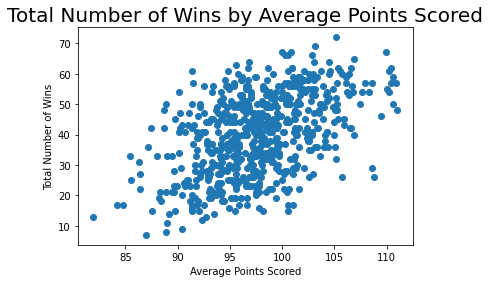

Correlation between Average Points Scored and the Total Number of Wins
Pearson Correlation Coefficient = 0.4777
P-value = 0.0


In [3]:
# Scatterplot and Correlation for Total Wins and Average Points

import scipy.stats as st

plt.plot(nba_df['avg_pts'], nba_df['total_wins'], 'o')

plt.title('Total Number of Wins by Average Points Scored', fontsize=20)
plt.xlabel('Average Points Scored')
plt.ylabel('Total Number of Wins')
plt.show()

corr_coeff, p_value = st.pearsonr(nba_df['avg_pts'], nba_df['total_wins'])

print("Correlation between Average Points Scored and the Total Number of Wins")
print("Pearson Correlation Coefficient =", round(corr_coeff, 4))
print("P-value =", round(p_value, 4))

In [4]:
# Simple Linear Regression

import statsmodels.formula.api as smf

model1 = smf.ols('total_wins ~ avg_pts', nba_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             total_wins   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     182.1
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           1.52e-36
Time:                        20:01:07   Log-Likelihood:                -2385.4
No. Observations:                 618   AIC:                             4775.
Df Residuals:                     616   BIC:                             4784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -85.5476      9.305     -9.194      0.0

In [5]:
# Given the F-statistic and P-value from the above calculations, it is safe to say that there is a positive correlation between
# Total Wins and Average Points Scored
# However, due to the low coefficient of determination (0.228), it is not a strong correlation.

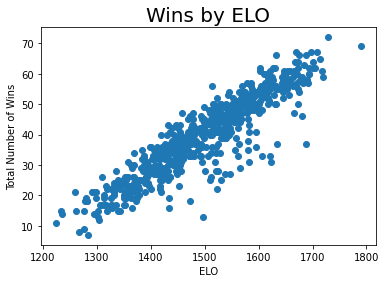

Correlation between ELO and Total Number of Wins
Pearson Correlation Coefficient = 0.9072
P-value = 0.0


In [6]:
# Scatterplot and Correlation for Total Wins and ELO

plt.plot(nba_df['avg_elo_n'], nba_df['total_wins'], 'o')

plt.title('Wins by ELO', fontsize=20)
plt.xlabel('ELO')
plt.ylabel('Total Number of Wins')
plt.show()

corr_coeff, p_value = st.pearsonr(nba_df['avg_elo_n'], nba_df['total_wins'])

print("Correlation between ELO and Total Number of Wins")
print("Pearson Correlation Coefficient =", round(corr_coeff, 4))
print("P-value =", round(p_value, 4))

In [7]:
# Multiple Regression
# Predicting the Total Wins using Average Points Scored and ELO

import statsmodels.formula.api as smf

model2 = smf.ols('total_wins ~ avg_pts + avg_elo_n', nba_df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             total_wins   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1580.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          4.41e-243
Time:                        20:15:32   Log-Likelihood:                -1904.6
No. Observations:                 618   AIC:                             3815.
Df Residuals:                     615   BIC:                             3829.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -152.5736      4.500    -33.903      0.0

In [8]:
# Using Average Points AND Average ELO, our model becomes much more accurate
# Each has a large T-statistic and P-values of zero which mean they are both statistically significant to the model
# Also, the large coefficient of determination (0.837) means that there is a strong correlation

In [9]:
# Multiple Regression with Three Variables
# Predicting Total Wins using Average Points Scored, Average ELO, and Average Points Differential

import statsmodels.formula.api as smf

model3 = smf.ols('total_wins ~ avg_pts + avg_elo_n + avg_pts_differential', nba_df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             total_wins   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1449.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          5.03e-278
Time:                        20:24:09   Log-Likelihood:                -1819.8
No. Observations:                 618   AIC:                             3648.
Df Residuals:                     614   BIC:                             3665.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -35.8921 

In [ ]:
# This model also is a strong predictor of Total Wins